# Домашняя работа №2
Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 16 февраля 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [Майнор ИАД 2016] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Метод главных компонент при работе с изображениями

Скачайте небольшую [базу](http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html) изображений лиц. В ней содержится по 10 изображений на каждого из 40 субъектов. 

Функция `read_pgm` загружает данные из файла формата pgm в numpy.array размера $112 \times 92$. Значения в этом массиве лежат в интервале $[0, 255]$, значение $0$ соответствует черному цвету, а значение $255$ - белому.
256 Shades of Grey...

In [ ]:
import re
import numpy as np
import os

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def read_pgm(filename, byteorder='>'):
    '''
    Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    '''
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                         dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                         count=int(width)*int(height),
                         offset=len(header)
                        ).reshape((int(height), int(width)))


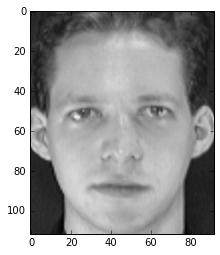

In [18]:
image = read_pgm('att_faces/s1/1.pgm', byteorder='<')
image.flags.writeable = True
plt.imshow(image, plt.cm.gray)

**Задача 1.** Импортируйте изображения всех 40 субъектов. В результате выполнения этой задачи вы должны получить

* Матрицу $X$ размера $400 \times 10304,$ $(10304 = 112 \cdot 92)$
* Массив $y$ длинны $400$ с идентификаторами субъектов от $1$ до $40$

In [ ]:
X = np.empty((400, 10304))
y = np.empty((400, ))

att_faces_dir = './att_faces'

i = 0
for folder in os.listdir(att_faces_dir):
    subject_dir = os.path.join(att_faces_dir, folder)
    if os.path.isdir(subject_dir):
        for pgm in os.listdir(subject_dir):
            # Your code here

**Задача 2.** Изобразите "усредненный" портрет субъекта по всей базе

In [ ]:
# Your code here

**Задача 3.** Разделите выборку на 2 группы в пропорции 80/20 (должно получиться 320 и 80 изображений):

* Галерея: часть набора изображений, для которого известен идентификатор субъекта
* Проба: часть набора изображений, для которого необходимо будет определить идентификатор субъекта

Используйте метод `np.random.choice()`. Сэплирование необходимо произвести без возрата!

In [ ]:
# Your code here

**Задача 4.** Идентификация "в лоб"

Выберите меру расстояния и помощью метода `scipy.spatial.distance.cdist()` посчитайте расстояние между всеми парами изображений галерея-проба.

Для каждлого изображения из пробы, определите какому субъекту принадлежит ближайшая картинка из галереи. Используйте метод `np.argmin()`. Оцените ошибку идентификаии. 

In [ ]:
from scipy.spatial import distance

In [ ]:
# Your code here

**Задача 4.** Метод главных компонент

Примените метод главных компонент к набору данных из галереи (Сохраните массивы средних - они вам еще приходятся). 

Определите, сколько компонент достаточно для достижения того же (или лучшего) качаства идентификации.

In [ ]:
# Your code here

**Задача 5.** Разложение лица по компонентам

Мы уже знаем, что для любой матрицы можно расчитать сингулярное разложение:
$$ A = U \Sigma V^\top .$$ (Кстати, проверьте, что `A = u.dot(Sigma).dot(v)`)

Выполним "разложение" изображения по перым $k$ главным компонентам. Это значит, что надо расчитать матрицу
$$ A' = U \Sigma^{(k)} V^\top ,$$
где матрица $\Sigma^{(k)}$ получилась как матрица $\Sigma$, в которой все значения, кроме $k$ первых строк заменили на 0.

Выберите лицо и разложите его на $k=10, 20, 50, 100$ компонент. Изобразите оригинальное изображение и результаты разложения.

In [ ]:
# Your code here

## 2. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [ ]:
# Your code here

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [ ]:
# Your code here

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [ ]:
# Your code here

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [ ]:
# Your code here